# &nbsp; **Числени методи и програмиране в инженерната практика**
***
* *докторска програма:* &nbsp;&nbsp;&nbsp; „**Проектиране и 
конструиране на автоматични и пилотирани летателни апарати**“ 

* *докторант:* &nbsp;&nbsp;&nbsp; **к-н инж. Николай Георгиев Кънчев**
* 30.05.2022 г.
***

## &nbsp; 1. Условие на задачата

Съставен прът е хванат конзолно между абсолютно твърдите стени $A$  и $D$. 

Дадени са дължините на частите на пръта в ненапрегнато състояние $𝑙
_1, 𝑙_2$ и $𝑙_3$, площите на напречните им сечения $𝑆_1, 𝑆_2$ и $𝑆_3$ и модула на еластичност на материала $E$. В сечение $B$ е приложена сила $F$. 

Tърсят се реакциите на опорите в стените, осевите напрежения в елементите на пръта и 
преместванията на сечения $B$ и $C$.
1.  Задачата да се реши по **метода на крайните елементи**.
2.  Да се представи алгоритъм на решението като последователност на формули и операции, или във вид на блок-схема.
3.  Да се представи код на програмата за решаване на задачата
4.  Да се демонстрира работоспособността на програмата като се въведат данни за които има просто аналитично решение
5.  Да се демонстрира работоспособността на програмата с произволен смислен набор входни данни.
***

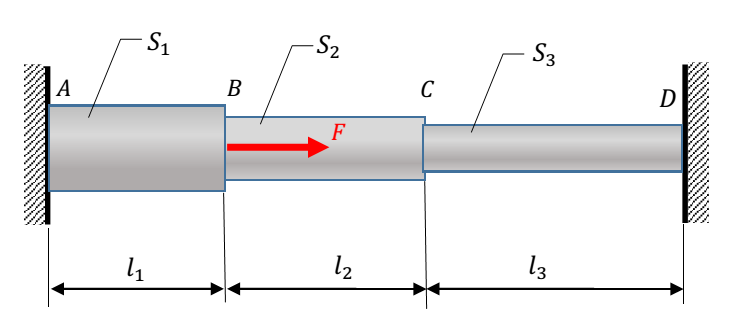

## &nbsp; 2. Теоретична част
***


###  2.1. Основни предположения
- обектът е с хомогенна изотропна структура;
- деформацията се реализира до границата на пропорционалност;
- натоварването е статично
- системата е консервативна (отсъства дисипация)
***

###  2.2. Уравнения от физиката (*енергиен подход*)

В равновесно положение кинематично допустимите (удовлетворяващи граничните условия) деформации на съставния прът са тези деформации, при които пълната потенциална енергия на системата е минимална (*Принцип за минимум на пълната потенциална енергия*):
$$
\delta \Pi = 0 \hspace{10mm} ⇔ \hspace{10mm} \delta (U+V) = 0 ,
$$
където $\delta$ е т.нар. **вариационен оператор**, $U$ е потенциалната енергия на деформация на системата, a $V$ е потенциалната енергия на външните сили.
***
* Деформационна енергия на системата:
$$
U = \int\limits_{V} U_0 dV = \int\limits_{V} \int^{\epsilon_ij} \limits_{0} \sigma_{ij} d\epsilon_{ij} dV
$$
В конкретната задача натоварването е осево, при което напрежения и деформации възникват единствено по оста $x$:
$$
U = \int\limits_{V} \int^{\epsilon_x} \limits_{0} \sigma_{x} d\epsilon_{x} dV
$$
Прилагайки закона на Хук $\sigma_x = E \epsilon_x$:
$$
U = \int\limits_{V} \int^{\epsilon_x} \limits_{0} E \epsilon_x d\epsilon_{x} dV = \int\limits_{V} \frac{1}{2} E \epsilon_x^2 dV = \int\limits_{V} \frac{1}{2} E \left( \frac{\partial u}{\partial x} \right)^2 dV
$$
За система, съставена от 3 пръта с различни площи на напречното сечение:
$$
U = \sum_{i=1}^3 \int^{l_i}\limits_{0} \frac{1}{2} EA_i  \left( \frac{\partial u}{\partial x} \right)^2 dx
$$
***
* Потенциална енергия на съсредоточените външните сили:
$$
V = \sum_{i=1}^N P_i u_i \hspace{2mm} ,
$$
където $N$ е броят на съсредоточените сили.
***
* Пълна потенциална енергия на системата:
$$
\Pi = \sum_{i=1}^3 \int^{l_i}\limits_{0} \frac{1}{2} EA_i  \left( \frac{\partial u}{\partial x} \right)^2 dx + \sum_{i=1}^N P_i u_i
$$
Съгласно принципа за минимум на пълната потенциална енергия на системата:
$$
\delta \Pi = 0 \hspace{5mm} \Rightarrow \hspace{5mm} \delta U + \delta V = 0 \\
\delta U = \sum_{i=1}^3 \int^{l_i}\limits_{0} EA_i \frac{\partial u}{\partial x} \frac{\partial \delta u}{\partial x} dx \\
\delta V = \sum_{i=1}^N P_i \delta u_i
$$
***
Окончателно вариационно уравнение за равновесие на съставния прът (*диференциална форма*, **weak form**):
$$
\sum_{i=1}^3 \int^{l_i}\limits_{0} EA_i \frac{\partial u}{\partial x} \frac{\partial \delta u}{\partial x} dx + \sum_{i=1}^N P_i \delta u_i = 0 ,
$$
където $u$ са онези премествания в структурата на съставния прът, при които възникващото поле на деформациите реализира минимум на пълната потенциална енергия на системата.
***

###  2.3. Числено решение по метода на крайните елементи
Методът на крайните елементи е числен метод за апроксимация на решението на частно диференциално уравнение посредством дискретизация на дефиниционната му област (т.нар. домейн) чрез множество от възли, групирани в т.нар. крайни елементи. Апроксимираните решения в отделните възли позволяват апроксимация на решението в областите между тях с прилагане на интерполационни функции (т.нар. *функции на формата*, **shape functions**).
Съществено предимство на метода на крайните елементи пред други числени методи за решение на диференциални уравнения (*метод на Риц, метод на Гальоркин, метод на колокацията и др.*) е възможността за директно използване на диференциалната форма на вариационното уравнение. За целта е необходимо предварително да се зададе интерполационна функция за преместванията, която зависи от избрания тип краен елемент.

Съставният прът по условие е натоварен осево, поради което най-подходящ модел от физична и изчислителна гледна точка е моделът с крайни елементи от тип прът, съставен от два възела, всеки от които с по една степен на свобода - преместване по $x$. От тази гледна точка, моделът на съставния прът представлява крайно-елементен модел, съставен от три последователно свързани пръта (4 възела), като най-първият и най-последният възел са неподвижно закрепени. Общият брой степени на свобода на модела е $(4-2)$.

Ако са известни преместванията във възлите чрез интерполация можем да получим преместванията в точките между възлите. При два възела на крайния елемент интерполацията е линейна:
$$
u(x) = a_1 + a_2 x 
$$
* $x = 0 \hspace{3mm} \Rightarrow \hspace{3mm} u(0) = u_1 \hspace{3mm} \Rightarrow \hspace{3mm} a_1 = u_1 $
* $x=l \hspace{3mm} ⇒ \hspace{3mm} u(l) = u_2 \hspace{3mm} ⇒ \hspace{3mm} a_2 = \frac{u_2 - u_1}{l}$
$$
u(x) = u_1 + \frac{u_2 - u_1}{l} x = \left( 1- \frac{x}{l} \right) u_1 + \left(\frac{x}{l} \right) u_2 = N_1 u_1 + N_2 u_2  ,
$$

където $N_1 = \left( 1- \frac{x}{l} \right)$ и $N_2 = \left( \frac{x}{l} \right)$ са т.нар. **функции на формата** (*shape functions*).
Записваме уравнението в матричен вид:
$$
u(x) = \left[\left( 1- \frac{x}{l} \right) \hspace{3mm} \left( \frac{x}{l} \right)\right] \begin{Bmatrix} u_1 \\ u_2 \end{Bmatrix} = \mathrm{N}^T \mathrm{\delta}_e ,
$$

където $\mathrm{\delta}_e$ е векторът на възловите премествания.

Така дефинираното поле на преместванията води до следната формулировка за полето на деформациите:
$$
\epsilon_x = [\partial ] u(x) = [\partial ] [\mathrm{N}]\{\mathrm{\delta}\}_e = [\mathrm{B}]\{\mathrm{\delta}\}_e ,
$$

където $[\partial ]$ е диференциален оператор, а $[\mathrm{B}]=[\partial ] [\mathrm{N}]$ съдържа производните на интерполационните функции $N_1$ и $N_2$:
$$
[\mathrm{B}] = \begin{bmatrix} \frac{-1}{l} & \frac{1}{l} \end{bmatrix}
$$

След заместване на изразите за $u(x)$ и $\epsilon_x$ в уравнението за пълната потенциална енергия се получава:
$$
\Pi_e = \int^{l}\limits_{0} \frac{1}{2} \mathrm{\delta}_e^T \mathrm{B}^T \mathrm{B} \mathrm{\delta}_e EA_e dx + \sum_{i=1}^N \mathrm{\delta}_e^T \mathrm{N}^T_i P_i
$$
Понеже $\mathrm{\delta}_e$ не зависи от $x$ може да бъде изведено извън интеграла:
$$
\Pi_e = \frac{1}{2} \mathrm{\delta}_e^T \left( \int^{l}\limits_{0} \mathrm{B}^T \mathrm{B}  EA_e dx \right) \mathrm{\delta}_e + \mathrm{\delta}_e^T \sum_{i=1}^N  \mathrm{N}^T_i P_i
$$
На този етап в метода на крайните елементи се въвеждат следните обозначения:
$$
[\mathrm{k}]_e = \int^{l}\limits_{0} \mathrm{B}^T \mathrm{B}  EA_e dx ,\\ 
\{\mathrm{f}\}_e = \sum_{i=1}^N  \mathrm{N}^T_i P_i ,
$$
където $[\mathrm{k}]_e$ е т.нар. **матрица на коравина** на крайния елемент, а $\{\mathrm{f}\}_e$ е векторът на външните възлови сили. Интегралът на матрицата на коравина се решава числено, най-често чрез Гаусови квадратури. За целта е небходимо границите на интеграла да се сменят от $\int^b\limits_{a}$ на $\int^1\limits_{-1}$ (т.нар. *естествена координатна система*) чрез прилагане на следната линейна трансформация:
$$
\xi = \frac{2x - (a+b)}{b-a} = \frac{2x-l}{l} \hspace{3mm} ⇒ \hspace{3mm} x = \frac{l}{2} (\xi +1) \\
dx = \frac{l}{2} d\xi \hspace{3mm} ⇒ \hspace{3mm} \frac{dx}{d\xi} = \frac{l}{2} = |J| \\
\frac{d}{dx} = \frac{d}{d\xi} \frac{d\xi}{dx} = \frac{1}{|J|} \frac{d}{d\xi}
$$

където $J$ представлява т.нар. **якобиан** на линейната трансформация.

Уравнението за елементарната матрица на коравина $[k]_e$ се преобразува както следва:
$$
[\mathrm{k}]_e = \int^{l}\limits_{0} \mathrm{B}^T \mathrm{B}  EA_e dx = \frac{EA}{|J|} \int^{1}\limits_{-1} \frac{d\mathrm{N}^T}{d\xi} \frac{d\mathrm{N}}{d\xi} d\xi ≈ \frac{EA}{|J|} \sum_{i=1}^n \frac{d\mathrm{N}^T_i}{d\xi} \frac{d\mathrm{N}_i}{d\xi} w_i ,
$$

където $n$ е броят на точките в избраната квадратура на Гаус, а $w_i$ са тегловните коефициенти, съответстващи на всяка точка от квадратурата. Например:
* при $n=1$: $\xi=0$, $w=2$;
* при $n=2$: $\xi=\pm \sqrt{1/3}$, $w_1 = w_2 = 1$ и т.н.

В естествена координатна система функциите на формата и техните производни се дефинират както следва:
$$
N_1 = \frac{1-\xi}{2} \hspace{10mm} N_2 = \frac{1+\xi}{2} \\
\frac{dN_1}{d\xi} = - \frac{1}{2} \hspace{10mm} \frac{dN_2}{d\xi} = \frac{1}{2}
$$

***

Окончателният вид на дискретизираното уравнение за пълната потенциална енергия на системата е:
$$
\Pi_e = \frac{1}{2} \mathrm{\delta}_e^T [\mathrm{k}]_e \mathrm{\delta}_e + \mathrm{\delta}_e^T \{\mathrm{f}\}_e
$$

Понеже потенциалната енергия на крайния елемент $\Pi_e$ представлява скаларна величина, то пълната потенциална енергия на системата получаваме чрез сумиране на потенциалните енергии на всички $N$ на брой крайни елементи:
$$
\Pi = \sum_{i=1}^N \Pi_{e,i} = \frac{1}{2} \mathrm{\delta}^T [\mathrm{K}] \mathrm{\delta} + \mathrm{\delta}^T \{\mathrm{F}\} ,
$$
където $[\mathrm{K}]$ представлява **глобалната матрица на коравина** за цялата система, а $\{\mathrm{F}\}$ е глобалният вектор на натоварванията във всички възли:
$$
[\mathrm{K}] = \sum_{i=1}^N [\mathrm{k}]_e \\
\{\mathrm{F}\} = \sum_{i=1}^N \{\mathrm{f}\}_e
$$

Съгласно *принципа за минимум на потенциалната енергия* при равновесие на системата потенциалната енергия е минимална при малка вариация по степените на свобода във всяка възлова точка от дискретизираната област:
$$
\delta \Pi = 0 \hspace{3mm} ⇒ \hspace{3mm} 
\frac{\partial \Pi}{\partial u_1} = \frac{\partial \Pi}{\partial u_2} = … = \frac{\partial \Pi}{\partial u_N} = 0 \hspace{3mm} ⇒ \hspace{3mm} 
\frac{\partial \Pi}{\partial \{ \delta \}^T} = 0 
$$
В резултат възниква следната система от линейни алгебрични уравнения:
$$
[\mathrm{K}] \mathrm{\delta} = \{\mathrm{F}\}
$$

Матрицата $[\mathrm{K}]$ е симетрична, положително дефинирана, което означава, че решение на СЛАУ съществува и това решение е единствено. В зависимост от размерността на системата, е възможно прилагането както на директни, така и на итеративни числени методи за решение. В конкретния пример, отнасящ се до моделирането и крайноелементния анализ на съставен прът системата може да бъде решена директно чрез прилагане на **елиминация на Гаус**. 

## &nbsp; 3. Алгоритъм на числената процедура
***
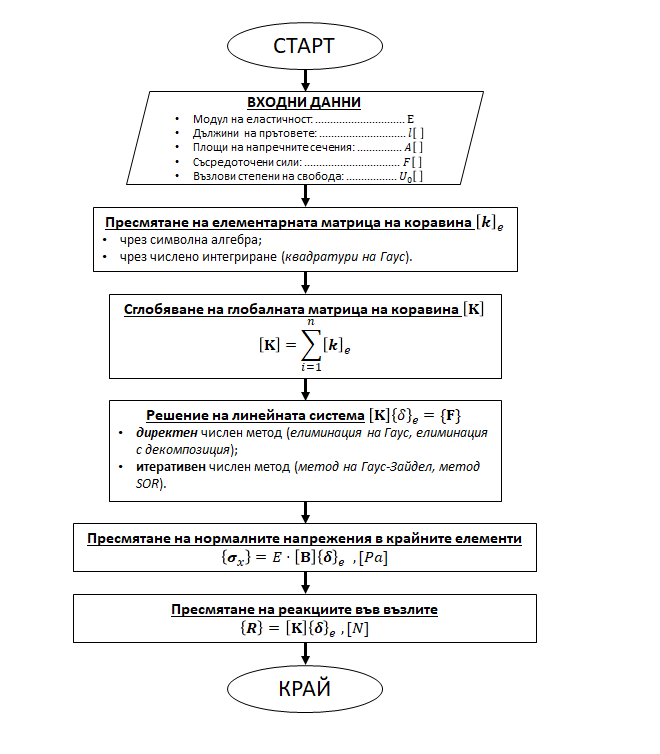


## &nbsp; 4. Реализация на числената процедура
***


In [2]:
"""
#------------------------------------------------------------
# Created by:   Nikolai Kanchev, assistant professor
#------------------------------------------------------------
# Date: 		    27.05.2022
#------------------------------------------------------------
# Description: 	Finite element solver for 1D uniaxial bar system
#               with symbolic and Gauss quadrature evaluation of 
#               the elementary stiffness matrix and direct Gauss
#               elimination for the final linear system solution
#------------------------------------------------------------
"""

import numpy as np               # Библиотека с функции за работа с матрици
import matplotlib.pyplot as plt  # Библиотека с фунцкии за визуализация на данни
import sympy as sp               # Библиотека с функции за символни операции

################################################################################
# ВХОДНИ ДАННИ                                                                 #
################################################################################
# Модул на еластичност
E = 210*10**9                    # 210 GPa: стомана

# Дължини на прътовете, [m]
l = np.array([1.0, 1.0, 1.0])
# Площи на напречните сечения, [m^2]
A = np.array([0.144, 0.064, 0.016])

# Възлови сили, [N]
F = np.array([0, 5000, 0, 0])

# Гранични условия
U_dofs = np.array([0, 1, 1, 0]).astype(np.float64)

################################################################################                                                                #
################################################################################
# Брой крайни елементи
eNum = len(l)

# Брой степени на свобода на отделния краен елемент
edof = 2

# Брой възли
nNum = eNum + 1

# Брой степени на свобода
dofs = nNum * 1

print("-------------------------\n Крайно-елементен модел: \n-------------------------\n >> Брой крайни елементи: ",
      eNum, "\n >> Брой възли: ", nNum, "\n >> Брой степени на свобода: ",
      dofs, "\n >> Фиксирани възли: ", np.array((np.where(U_dofs == 0)[0]))+1, 
      "\n >> Натоварване е приложено към възли: ", np.array((np.nonzero(F)))+1, 
      " съответно с величина и посока ", F[np.nonzero(F)],"N")
################################################################################
################################################################################

-------------------------
 Крайно-елементен модел: 
-------------------------
 >> Брой крайни елементи:  3 
 >> Брой възли:  4 
 >> Брой степени на свобода:  4 
 >> Фиксирани възли:  [1 4] 
 >> Натоварване е приложено към възли:  [[2]]  съответно с величина и посока  [5000] N


In [3]:
# Функция за символно пресмятане на локалната матрица на коравина
def ke_2(bar_E, bar_area, bar_length):
  # Дефиниране на символни променливи
  x, l = sp.symbols("x, l")
  E, A = sp.symbols("E, A")

  # Дефиниране на символни функции
  N1 = sp.Function("N1")(x)
  N2 = sp.Function("N2")(x)

  N1 = 1 - x/l
  N2 = x/l

  # Дефиниране на символните матрици N и B
  N = sp.Matrix([[N1, N2]])        # Вектор на интерполационните функции N1 и N2
  B = N.diff(x)                    # Вектор с производните на N1 и N2

  # Символно пресмятане на елемнтарната матрица на коравина
  expr = sp.transpose(B)*B * E * A
  k = sp.integrate(expr, [x,0,l])
  k_num = k.subs({A: bar_area, E: bar_E, l: bar_length})
  return np.array(k_num).astype(np.float64)

# Тестване на функцията
ke = ke_2(E, A[0], l[0])
ke

array([[ 3.024e+10, -3.024e+10],
       [-3.024e+10,  3.024e+10]])

In [4]:
# Функция за пресмятане на функциите на формата в естествена координатна система
def shapeFunctions(ksi):
  N1 = (1-ksi)/2
  N2 = (1+ksi)/2
  dN1 = -0.5
  dN2 = 0.5
  return [[N1, N2],[dN1, dN2]]

# Функция за числено интегриране на матрицата на коравина чрез квадратури на Гаус
def ke_2_Gauss(bar_E, bar_area, bar_length, gaussPoints=1):  
  # Пресмятане на Якобиана на линейната трансформация
  detJ = bar_length/2         # dx/dξ
  invJ = 1/detJ

  # Пресмятане на производните на функциите на формата в естествени координати
  # >> При една Гаусова точка (n=1): ξ=0, w=2
  ksi = 0
  w = 2

  B = np.zeros([edof])
  for i in range(0,edof):
    B[i] = shapeFunctions(ksi)[1][i]*invJ
  
  BT = B.reshape((-1,1))
  BTB = BT * B

  ke = np.zeros([edof, edof])
  ke = ke + BTB*w*detJ*bar_E*bar_area

  return ke

# Тестване на функцията
ke = ke_2_Gauss(E, A[0], l[0])
ke

array([[ 3.024e+10, -3.024e+10],
       [-3.024e+10,  3.024e+10]])

In [6]:
# Сглобяване на глобалната матрица на коравина
# При модел с три пръта => 4 степени на свобода => размерност 4 х 4
Ks = np.zeros((dofs, dofs))     # Матрица на коравина, синтезирана чрез символна алгебра
Kg = np.zeros((dofs, dofs))     # Матрица на коравина, синтезирана чрез квадратури на Гаус

for i in range(0,eNum):
  ke_s = ke_2(E,A[i],l[i])
  ke_g = ke_2_Gauss(E,A[i],l[i])
  di = edof
  Ks[i:i+di, i:i+di] = Ks[i:i+di, i:i+di] + ke_s
  Kg[i:i+di, i:i+di] = Kg[i:i+di, i:i+di] + ke_g

print("-----------------------------")
print("Глобална матрица на коравина: (символна алгебра)")
print("-----------------------------")
print(Ks)

print("\n-----------------------------")
print("Глобална матрица на коравина: (числено интегриране, метод на Гаус)")
print("-----------------------------")
print(Kg)

errK = abs((Ks - Kg)/Ks)*100
print("\n---------------------------------------")
print("Относителна грешка на глобалната матрица:")
print("-----------------------------------------")
print(errK)

-----------------------------
Глобална матрица на коравина: (символна алгебра)
-----------------------------
[[ 3.024e+10 -3.024e+10  0.000e+00  0.000e+00]
 [-3.024e+10  4.368e+10 -1.344e+10  0.000e+00]
 [ 0.000e+00 -1.344e+10  1.680e+10 -3.360e+09]
 [ 0.000e+00  0.000e+00 -3.360e+09  3.360e+09]]

-----------------------------
Глобална матрица на коравина: (числено интегриране, метод на Гаус)
-----------------------------
[[ 3.024e+10 -3.024e+10  0.000e+00  0.000e+00]
 [-3.024e+10  4.368e+10 -1.344e+10  0.000e+00]
 [ 0.000e+00 -1.344e+10  1.680e+10 -3.360e+09]
 [ 0.000e+00  0.000e+00 -3.360e+09  3.360e+09]]

---------------------------------------
Относителна грешка на глобалната матрица:
-----------------------------------------
[[ 0.  0. nan nan]
 [ 0.  0.  0. nan]
 [nan  0.  0.  0.]
 [nan nan  0.  0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [7]:
# Дефиниране на вектор със свободните степени на свобода
freeDofs = np.nonzero(U_dofs)

# Дефиниране на вектор с фиксираните степени на свобода
fixedDofs = np.where(U_dofs == 0)[0]

# Извличане на подматрица от глобалната матрица на коравина, съответстваща
# на свободните степени на свобода
K_free = Kg.copy()

n=0
for i in fixedDofs:
  K0 = np.delete(K_free,i-n,0)
  K_free = np.delete(K0,i-n,1)
  n=n+1

print("-----------------------------")
print("Глобална матрица на коравина за свободните степени на свобода:")
print("-----------------------------")
print(K_free)

F_free = F[freeDofs].reshape((-1,1))
print("\n-----------------------------")
print("Глобален вектор на натоварването при свободните степени на свобода:")
print("-----------------------------")
print(F_free)

-----------------------------
Глобална матрица на коравина за свободните степени на свобода:
-----------------------------
[[ 4.368e+10 -1.344e+10]
 [-1.344e+10  1.680e+10]]

-----------------------------
Глобален вектор на натоварването при свободните степени на свобода:
-----------------------------
[[5000]
 [   0]]


In [8]:
# Числено решение на СЛАУ чрез елиминация на Гаус: O(n^3)
def gaussElimination(K_free,f_free):
  K = K_free.copy()
  f = f_free.copy()

  n = len(f)
  u = np.zeros([n,1])
  # Фаза на елиминация
  for k in range(0,n-1):        # Цикъл, обхождащ всички редове надолу
    for i in range(k+1,n):      # Цикъл, изменящ редовете под текущия ред k
      if K[i,k] != 0.0:
        factor = K[i,k]/K[k,k]  # Пресмятане на коефициента на трансформация за ред i
        K[i,(k+1):n] = K[i,(k+1):n] - factor*K[k,(k+1):n]  # Трансформация на ред i
        f[i] = f[i] - factor*f[k]
  # Заместване назад
  for k in range(n-1,-1,-1):
    u[k] = (f[k] - np.dot(K[k,k+1:n],u[k+1:n]))/K[k,k]

  return u

u_gaussElim = gaussElimination(K_free, F_free)
u_gaussElim

array([[1.51835240e-07],
       [1.21440719e-07]])

In [9]:
# Решаване на СЛАУ чрез вградена функция в библиотеката Numpy
u_solution = np.linalg.solve(K_free, F_free)
u_solution

array([[1.51846453e-07],
       [1.21477162e-07]])

> Преместване във възел № 1 :    0.0  mm;
> Преместване във възел № 2 :    0.00015184645286686103  mm;
> Преместване във възел № 3 :    0.00012147716229348882  mm;
> Преместване във възел № 4 :    0.0  mm;


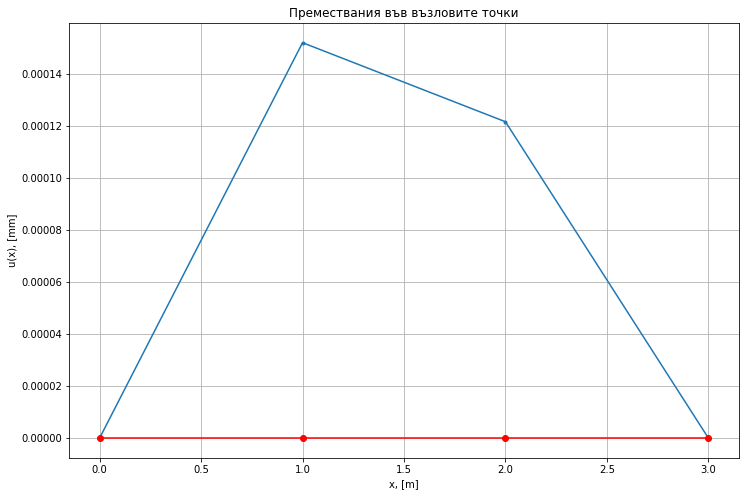

In [10]:
U_dofs[freeDofs] = u_solution.T
for i in range(len(U_dofs)):
  print("> Преместване във възел №",i+1,":   ",U_dofs[i]*1e3," mm;")

# Визуализация на преместванията във всички възли
counter = 0
l_list = [counter]
for i in range(len(l)):
  counter = counter + l[i]
  l_list.append(counter)

plt.rcParams["figure.figsize"] = (12,8)

plt.plot(l_list,U_dofs*1e3, '.-')
plt.grid()
plt.title("Премествания във възловите точки")
plt.xlabel("x, [m]")
plt.ylabel("u(x), [mm]")

plt.plot(l_list,np.zeros((len(l_list))),'o-r')

In [11]:
# Пресмятане на нормалните напрежения във всеки от крайните елементи
length = l.sum()
B = np.array([-1/length, 1/length])

elemStrains = []
elemStresses = []
for i in range(len(l)):
  estrain = np.dot(B,U_dofs[i:i+2].reshape(2,1))[0]
  elemStrains.append(estrain)
  elemStresses.append(E*estrain)
  print("> Нормално напрежение в краен елемент №",i+1,":   ", round(elemStresses[i],3)," Pa;")

> Нормално напрежение в краен елемент № 1 :    10629.252  Pa;
> Нормално напрежение в краен елемент № 2 :    -2125.85  Pa;
> Нормално напрежение в краен елемент № 3 :    -8503.401  Pa;


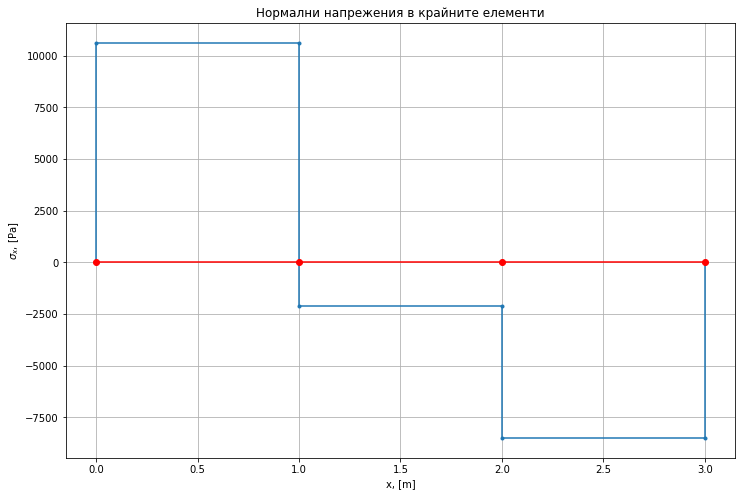

In [12]:
# Визуализация на нормалните напрежения във всеки от крайните елементи
xPts = []
stresses = []

for i in range(len(l)+1):
  xPts.append(l_list[i])
  xPts.append(l_list[i])
  if i==0:
    stresses.append(0)
    stresses.append(elemStresses[i])
  elif i==len(l):
    stresses.append(elemStresses[i-1])
    stresses.append(0)
  else:
    stresses.append(elemStresses[i-1])
    stresses.append(elemStresses[i])


plt.plot(xPts,stresses, '.-')
plt.grid()
plt.title("Нормални напрежения в крайните елементи")
plt.xlabel("x, [m]")
plt.ylabel(r"$\sigma_x$, [Pa]")

plt.plot(l_list,np.zeros((len(l_list))),'o-r')

In [13]:
# Пресмятане на реакциите във всеки от възлите
R = np.dot(Kg,U_dofs)

for i in range(len(R)):
  print("> Реакция във възел №",i+1,":   ",round(R[i],3)," N;")

> Реакция във възел № 1 :    -4591.837  N;
> Реакция във възел № 2 :    5000.0  N;
> Реакция във възел № 3 :    -0.0  N;
> Реакция във възел № 4 :    -408.163  N;


## &nbsp; 5. Валидация на крайния резултат
***